# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

But before we can get started, there's the bookkeeping stuff, the admin things. Do watch it - the material below tells you about key elements of how to do well in class, assignments and stuff.

## The informal intro (not to be missed)

Today I talk about 
* Recap on admin so far.
* The COVID-19 situation
* The user satisfaction questionnaire
* The assignments
* Forming groups
* Set up the peer evaluation video below

And the good news is that after today, we can take it easy with admin stuff for a while. We'll restart this aspect when we get closer to the project assignments that we finish the class with.

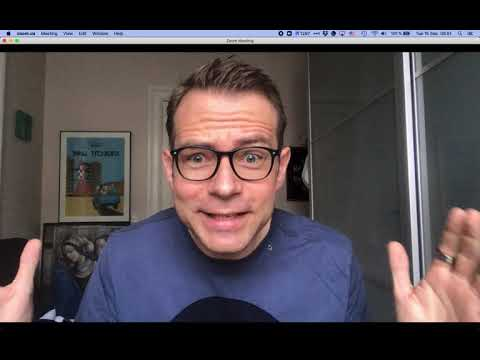

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("ASkdMRs4YH4",width=800, height=450)

# Part 0: The admin stuff 
### (Why we use Peer Evaluations Edition)

We use the system [Peergrade.io](http://peergrade.io/) to get you better feedback and make you smarter. In the video below, I explain why that is the case. There are a lot of good reasons that peer evaluations are great, so watch the video :)

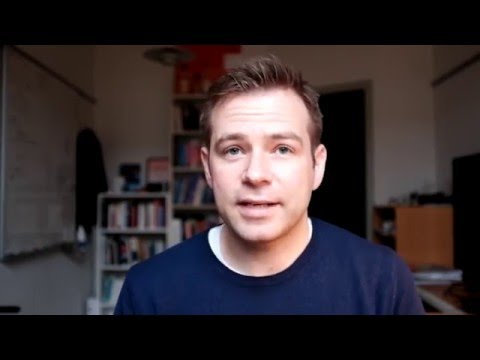

In [2]:
YouTubeVideo("-TC18KgpiIQ",width=800, height=450)

# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

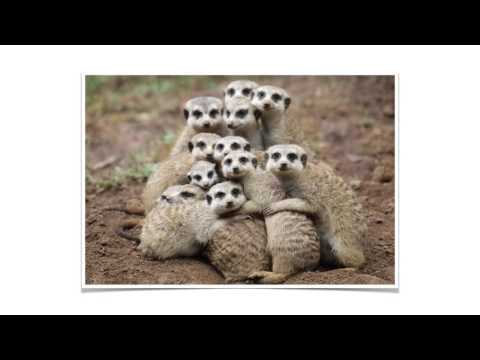

In [3]:
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 


> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
> 

**Answer**

* the random network model underestimates the size and the frequency of the high degree nodes, as well as the number of low degree nodes.

* 1. Subcritical Regime: 0 < ‹k› < 1
  2. Critical Point: ‹k› = 1 
  3. Supercritical Regime: ‹k› > 1
  4. Connected Regime: ‹k› > lnN
* The random network model does not capture the clustering of real networks. Instead real networks have a much higher clustering coefficient than expected for a random network of similar N and L. In real-world networks C(k) systematically decreases with the degree which is a violation of the prediction from random networks.

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
> * Play around with $p$. What's the value of $p$ for which the average shortest path length gets close to the fully randomized network (i.e. when $p = 1$).
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/ws.png)

In [85]:
import random
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.algorithms.shortest_paths import average_shortest_path_length

In [11]:
nodes = 500
k = 4
g1 = watts_strogatz_graph(nodes, k, 0)
g2 = watts_strogatz_graph(nodes, k, 0.1)
g3 = watts_strogatz_graph(nodes, k, 1)

print("Average shortest path length for each graph")
print(average_shortest_path_length(g1))
print(average_shortest_path_length(g2))
print(average_shortest_path_length(g3))

Average shortest path length for each graph
62.875751503006015
7.4239278557114226
4.791190380761523


When p = 1, the graph become fully connected, the average shortest path length roughly equals to the average degree

In [23]:
print(average_shortest_path_length(watts_strogatz_graph(nodes, k, 0.3)))

# roughly from p = 0.3

5.565234468937875


In [25]:
def getAverageLength(quantity, nodes, k, p):
    lens = []
    for i in range(quantity):
        tmp = watts_strogatz_graph(nodes, k, p)
        lens.append(average_shortest_path_length(tmp))
        
    return sum(lens) * 1.0 / quantity, np.std(lens)

In [27]:
ps = [0,0.01,0.03,0.05,0.1,0.2]
res = {}
for p in ps:
    ave, std = getAverageLength(50, 500, 4, p)
    res[p] = (ave, std)

Text(0, 0.5, 'average(<d>)')

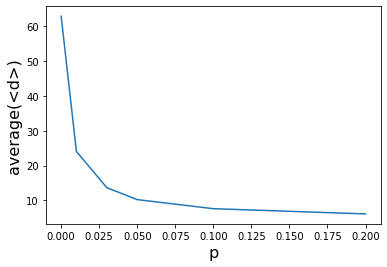

In [41]:
pltData = [res[key][0] for key in res.keys()]
plt.errorbar(ps, pltData)
plt.xlabel('p', fontsize=16)
plt.ylabel('average(<d>)', fontsize=16)

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

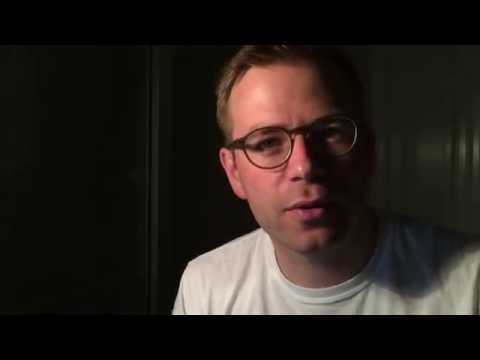

In [10]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
> 
> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success
> 
> * First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> * Now add another node, connecting one of the existing nodes in proportion to their degree.
> * Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> * Plot the network. 
> * Add more nodes until you have a 5000 node network.
> * What's the maximum and minimum degree?
> * Now, bin the degree distribution using `numpy.histogram`.
> * Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/ba.png)
> 
> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:
> 
> * Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> * Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.
> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
> 
> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 
> 
> * Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.
>

**Answer**

* 1. Anomalous Regime (γ≤ 2)
      The number of links connected to the largest hub grows faster than the size of the network, which means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, hence it will run out of nodes to connect to.
  2. Scale-Free Regime (2 ‹ γ ‹ 3)
      Scalefree networks in this regime are ultra-small, the market share of the largest hub, kmax /N, representing the fraction of nodes that connect to it.
  3. Random Network Regime (γ › 3)
      For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size.
      
* 1. Sublinear Regime (0 < α < 1) 
    The degree distribution follows the stretched exponential, resulting in fewer and smaller hubs than in a scale-free network.
  2. Linear Regime (α=1) 
    This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law. 
  3. Superlinear Regime (α > 1) 
    The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them.


# BA model

In [62]:
g = nx.Graph()
g.add_edges_from([(1, 2)])

def getNodeByDegree(g):
    edges = list(g.edges)
    tmp = []
    for item in edges:
        tmp.append(item[0])
        tmp.append(item[1])
    return random.choice(tmp)

for i in range(3, 101):
    node = getNodeByDegree(g)
    g.add_edge(i, node)

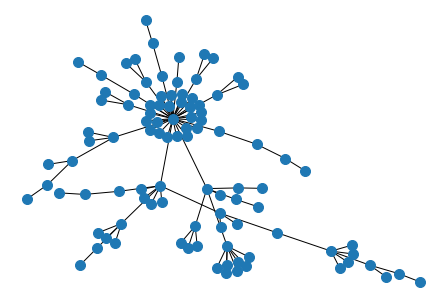

In [66]:
nx.drawing.nx_pylab.draw(g, node_size=100)

In [67]:
for i in range(101, 5001):
    node = getNodeByDegree(g)
    g.add_edge(i, node)

In [71]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
print("maximum degree is ", degree_sequence[0])
print("minimum degree is ", degree_sequence[-1])

maximum degree is  167
minimum degree is  1


In [94]:
np.histogram(degree_sequence)

(array([4967,   27,    4,    0,    1,    0,    0,    0,    0,    1]),
 array([  1. ,  17.6,  34.2,  50.8,  67.4,  84. , 100.6, 117.2, 133.8,
        150.4, 167. ]))

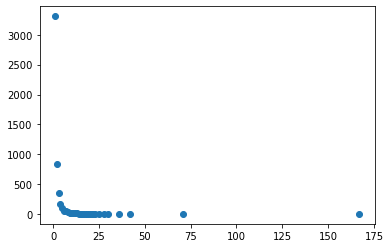

In [93]:
counter = collections.Counter(degree_sequence)
x, y = [], []
for key, value in counter.items():
    x.append(key)
    y.append(value)

plt.plot(x, y, 'o')

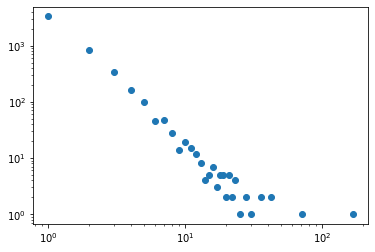

In [92]:
plt.loglog(x, y, 'o')

# Friendship paradox

In [106]:
picked = random.choice(list(g.nodes))
g.degree[picked]

1

In [107]:
for n in g.neighbors(picked):
    print(g.degree[n])

3


From my example, it is true that that 𝑖's friends (on average) have more friends than 𝑖.

In [113]:
def friendshipParadox():
    picked = random.choice(list(g.nodes))
    pickedDgree = g.degree[picked]
    _sum, count = 0.0, 0
    for n in g.neighbors(picked):
        _sum  += g.degree[n]
        count += 1
    return True if _sum / count > pickedDgree else False

paradoxTrue = 0
for i in range(1000):
    paradoxTrue += 1 if friendshipParadox() else 0

print(str(paradoxTrue) + ' out of 1000 times in which the friendship paradox is true')

867 out of 1000 times in which the friendship paradox is true


# comparison with ER network

In [118]:
k = sum(degree_sequence) / len(degree_sequence)
N = 5000
p = k / (N - 1)

erG = nx.generators.random_graphs.erdos_renyi_graph(N, p)

In [123]:
er_degree_sequence = sorted([d for n, d in erG.degree()], reverse=True)
print("maximum degree is ", er_degree_sequence[0])
print("minimum degree is ", er_degree_sequence[-1])

maximum degree is  9
minimum degree is  0


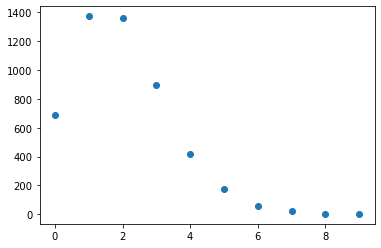

In [126]:
counter = collections.Counter(er_degree_sequence)
x, y = [], []
for key, value in counter.items():
    x.append(key)
    y.append(value)

plt.plot(x, y, 'o')

In [135]:
def numOfComponent(g):
    count = 0
    for com in nx.connected_components(g):
        count += 1
    return count

print("Number of component in BA model ", numOfComponent(g))
print("Number of component in ER model ", numOfComponent(erG))

Number of component in BA model  1
Number of component in ER model  829


Base on the calculation, we can see that in BA model, all nodes are connected(there's only one big component which includes all the nodes), and the degree distribution follows the power law distribution shows in the graph. On the other hand, the degree distribution of ER model follows Poisson distribution, and there are more components in the network compare to BA model. 